# Predicting Breast Cancer Recurrence Using Machine Learning

## Introduction
This notebook explores various Python-based machine learning techniques to build a predictive model capable of determining whether the cancer type is Malignant or Benign.

## Problem Definition
The goal of this predictive model is to classify breast cancer cases into **recurrence-events** or **no-recurrence-events**.

## Required Libraries
We will utilize the following tools and libraries:
- `pandas` for data manipulation
- `sklearn` for machine learning models (`LogisticRegression`, `RandomForestClassifier`, `SVM`)
- `Seaborn` and `Matplotlib` for data visualization

## Approach
Our workflow follows these structured steps:
1. **Problem Definition**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Data Visualization**
5. **Model Evaluation**
6. **Feature Selection**
7. **Model Deployment**

## Dataset
The dataset is sourced from the Kaggle Dataset Repository: [Breast Cancer Dataset](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset).

### Features Description
Below is a breakdown of features included in the dataset:

| Feature                  | Type        | Description                                      |
|--------------------------|------------|--------------------------------------------------|
| `id`                     | Unique ID  | Patient identifier                              |
| `diagnosis`              | Categorical | Cancer classification (`M` = Malignant, `B` = Benign) |
| `radius_mean`            | Continuous  | Mean of the tumor radius                        |
| `texture_mean`           | Continuous  | Mean texture of the tumor surface               |
| `perimeter_mean`         | Continuous  | Mean perimeter of the tumor                     |
| `area_mean`              | Continuous  | Mean area of the tumor                          |
| `smoothness_mean`        | Continuous  | Mean smoothness level                           |
| `compactness_mean`       | Continuous  | Mean compactness of tumor                       |
| `concavity_mean`         | Continuous  | Mean concavity of tumor structure               |
| `concave points_mean`    | Continuous  | Mean number of concave points                   |
| `symmetry_mean`          | Continuous  | Mean symmetry of the tumor                      |
| `fractal_dimension_mean` | Continuous  | Mean fractal dimension                          |
| `radius_se`              | Continuous  | Standard error of tumor radius                  |
| `texture_se`             | Continuous  | Standard error of texture                       |
| `perimeter_se`           | Continuous  | Standard error of perimeter                     |
| `area_se`                | Continuous  | Standard error of area                          |
| `smoothness_se`          | Continuous  | Standard error of smoothness                    |
| `compactness_se`         | Continuous  | Standard error of compactness                   |
| `concavity_se`           | Continuous  | Standard error of concavity                     |
| `concave points_se`      | Continuous  | Standard error of concave points                |
| `symmetry_se`            | Continuous  | Standard error of symmetry                      |
| `fractal_dimension_se`   | Continuous  | Standard error of fractal dimension             |
| `radius_worst`           | Continuous  | Worst-case radius measurement                   |
| `texture_worst`          | Continuous  | Worst-case texture measurement                  |
| `perimeter_worst`        | Continuous  | Worst-case perimeter measurement                |
| `area_worst`             | Continuous  | Worst-case area measurement                     |
| `smoothness_worst`       | Continuous  | Worst-case smoothness measurement               |
| `compactness_worst`      | Continuous  | Worst-case compactness measurement              |
| `concavity_worst`        | Continuous  | Worst-case concavity measurement                |
| `concave points_worst`   | Continuous  | Worst-case concave points measurement           |
| `symmetry_worst`         | Continuous  | Worst-case symmetry measurement                 |
| `fractal_dimension_worst`| Continuous  | Worst-case fractal dimension measurement        |

## Next Steps
The upcoming sections will cover:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training & Evaluation
- Hyperparameter Tuning
- Feature Importance


In [143]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    confusion_matrix,
    classification_report,
    recall_score,
    f1_score,
    accuracy_score,
    roc_curve,
    precision_score,
    roc_auc_score

)

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
  

## **_EDA_**

In [141]:
# Fetch dataset
breast_cancer = pd.read_csv('breast-cancer.csv')
breast_cancer

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [5]:
duplicates = breast_cancer.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [6]:
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
# Distribution of features
fig , ax = plt.subplots(1,2, figsize=(10, 5))
breast_cancer['diagnosis'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Diagnosis')
ax[0].set_ylabel('count')
sns.countplot(data=breast_cancer, x='diagnosis', hue='diagnosis', ax=ax[1])
ax[1].set_title('Diagnosis')
plt.show()
plt.savefig('plots/Diagnosis.png')

<Figure size 640x480 with 0 Axes>

In [8]:
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
m_cols = [ 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',]

In [10]:
s_cols = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'
]

In [11]:
w_cols = [
    'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

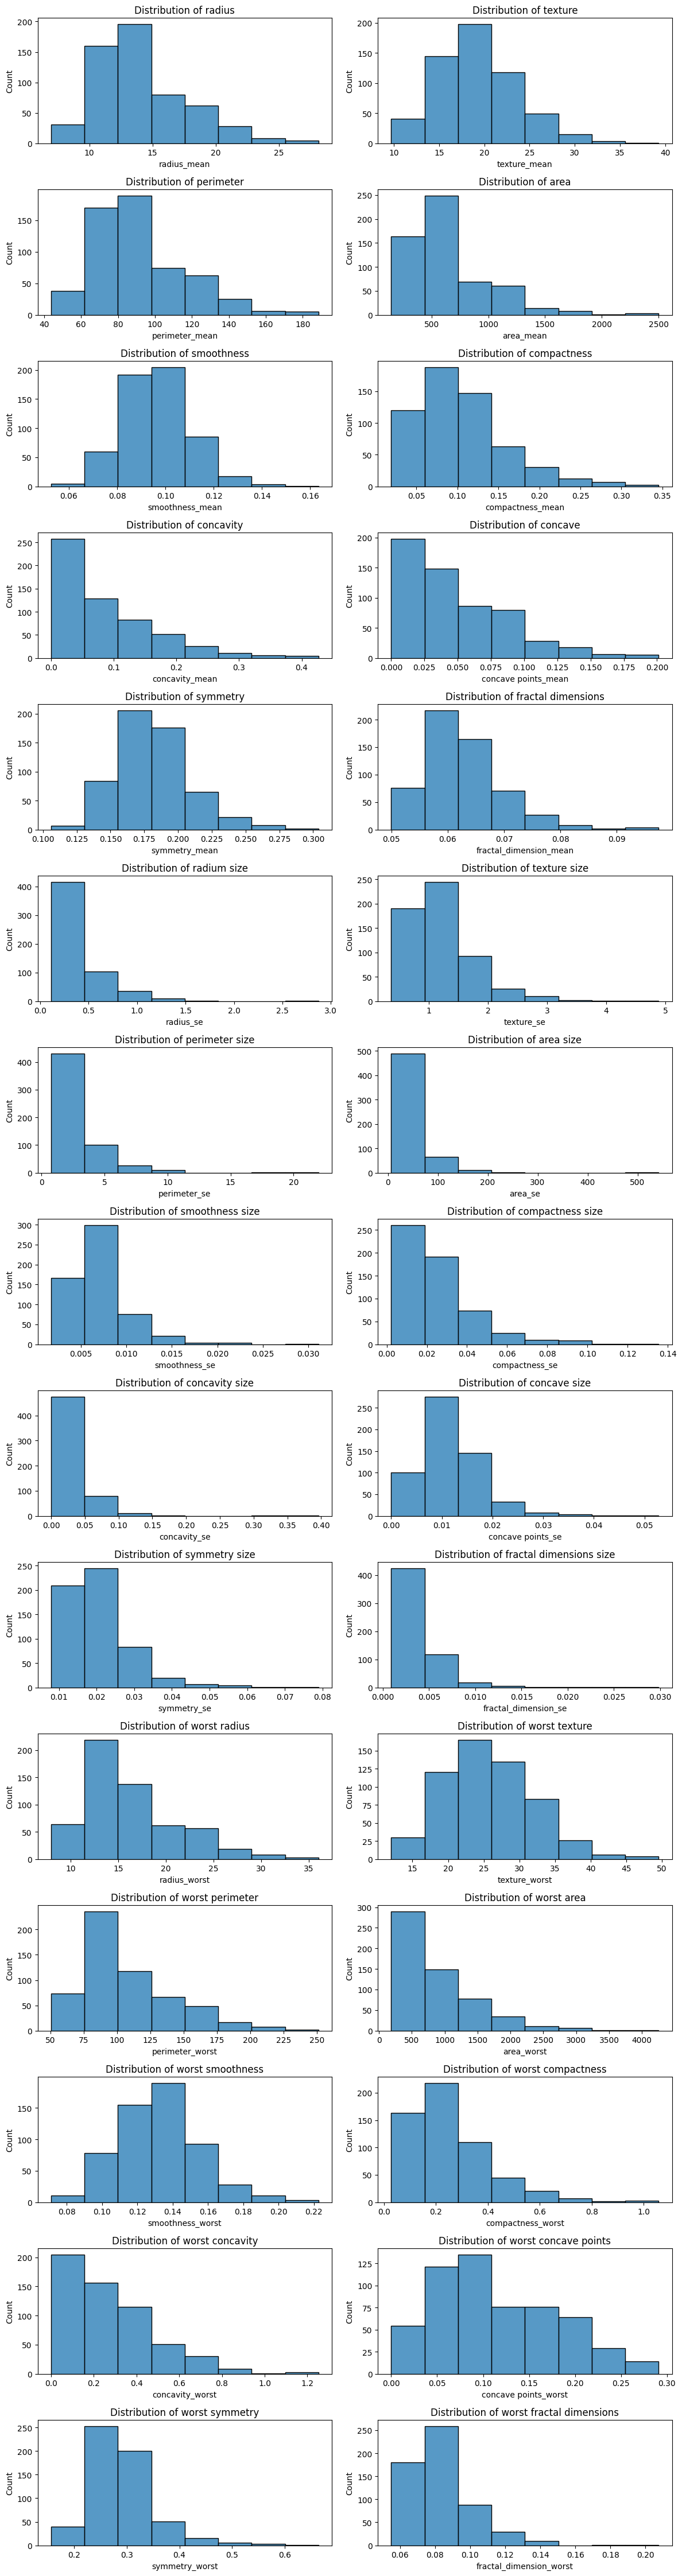

<Figure size 640x480 with 0 Axes>

In [105]:
# Define your features dictionary
features = {
    'radius_mean': 'radius',
    'texture_mean': 'texture',
    'perimeter_mean': 'perimeter',
    'area_mean': 'area', 
    'smoothness_mean': 'smoothness',
    'compactness_mean': 'compactness',
    'concavity_mean': 'concavity',
    'concave points_mean': 'concave',
    'symmetry_mean': 'symmetry',
    'fractal_dimension_mean': 'fractal dimensions',
    'radius_se': 'radium size',
    'texture_se': 'texture size',
    'perimeter_se': 'perimeter size', 
    'area_se': 'area size', 
    'smoothness_se': 'smoothness size',
    'compactness_se': 'compactness size',
    'concavity_se': 'concavity size', 
    'concave points_se': 'concave size', 
    'symmetry_se': 'symmetry size',
    'fractal_dimension_se': 'fractal dimensions size',
    'radius_worst': 'worst radius', 
    'texture_worst': 'worst texture',
    'perimeter_worst': 'worst perimeter',
    'area_worst': 'worst area', 
    'smoothness_worst': 'worst smoothness',
    'compactness_worst': 'worst compactness',
    'concavity_worst': 'worst concavity',
    'concave points_worst': 'worst concave points',
    'symmetry_worst': 'worst symmetry', 
    'fractal_dimension_worst': 'worst fractal dimensions'
}

# Filter features based on available columns in the dataframe
feature = {feature: title for feature, title in features.items() if feature in breast_cancer.columns}

# Determine the number of rows needed for subplots
num_features = len(feature)
rows = (num_features // 2) + (num_features % 2 > 0)  # Dynamically adjust rows

# Create subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, rows * 3))  
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate through features safely
for i, (feat, title) in enumerate(feature.items()):
    sns.histplot(breast_cancer[feat], bins=8, ax=axes[i])
    axes[i].set_title(f"Distribution of {title}")

# Remove any unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()
plt.savefig('plots/Distribution_Of_Feature.png')

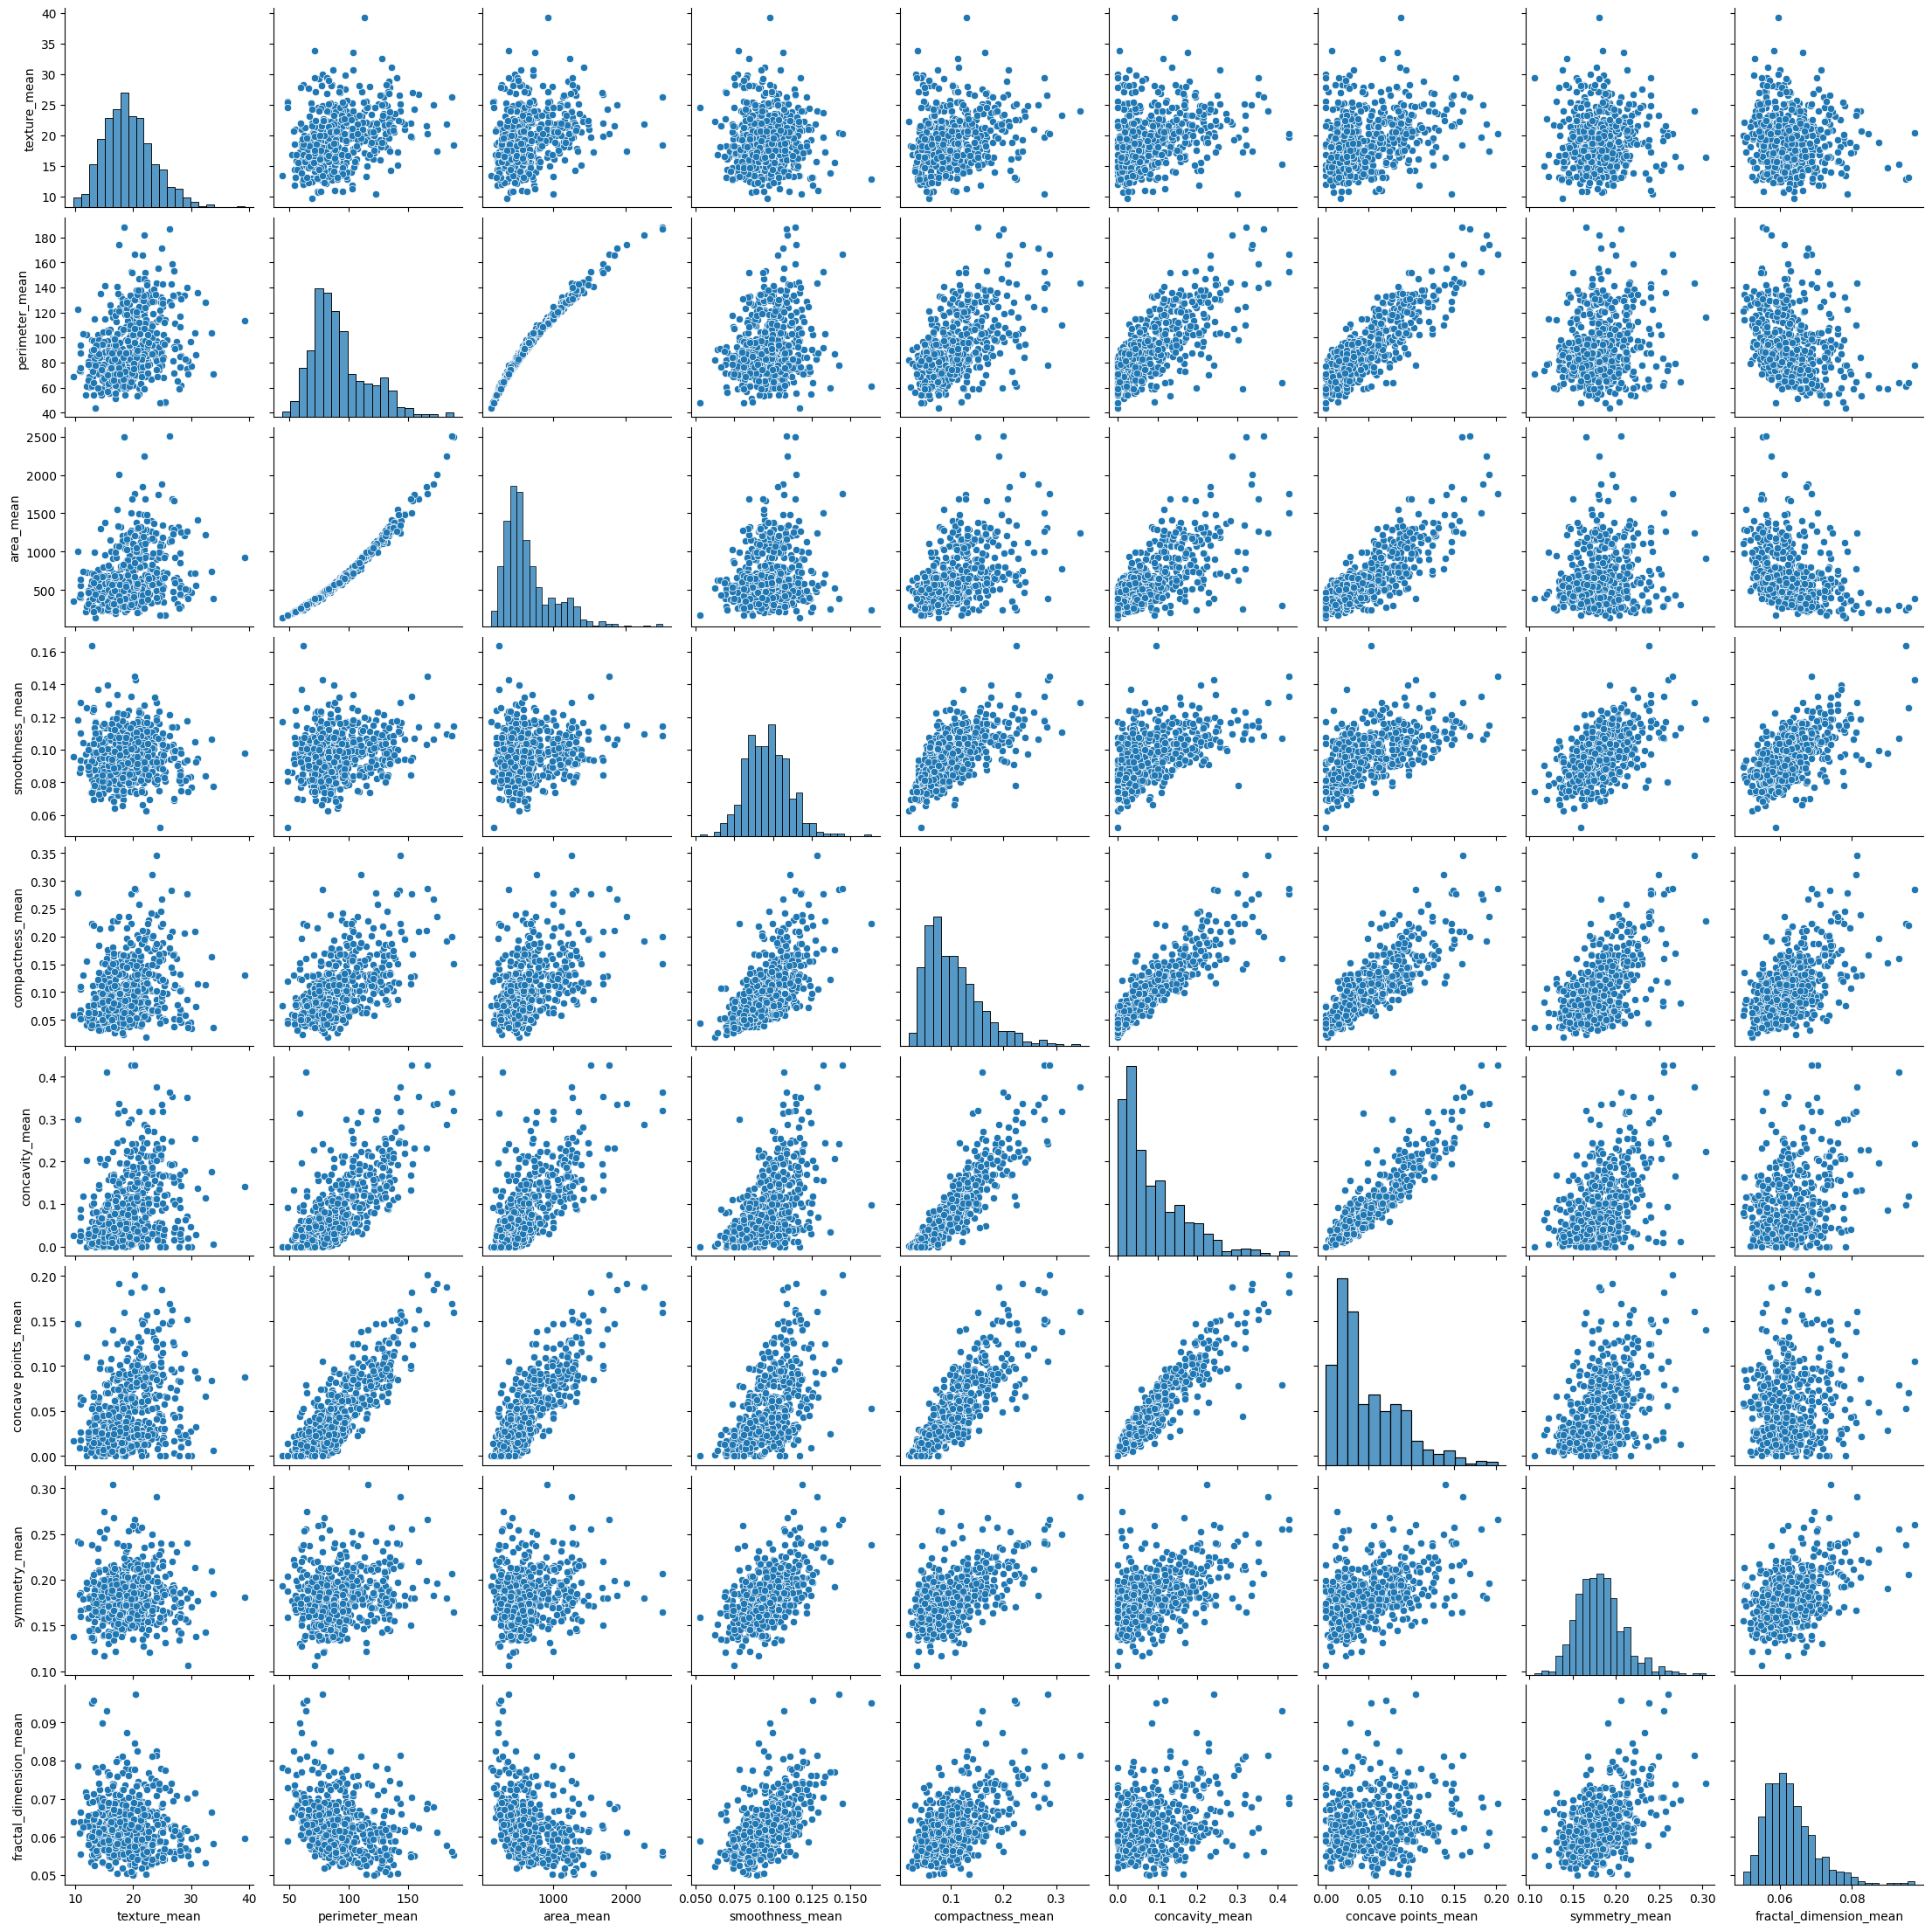

In [13]:
sns.pairplot(breast_cancer[m_cols]);
plt.savefig('plots/m_colsPairplot.png')

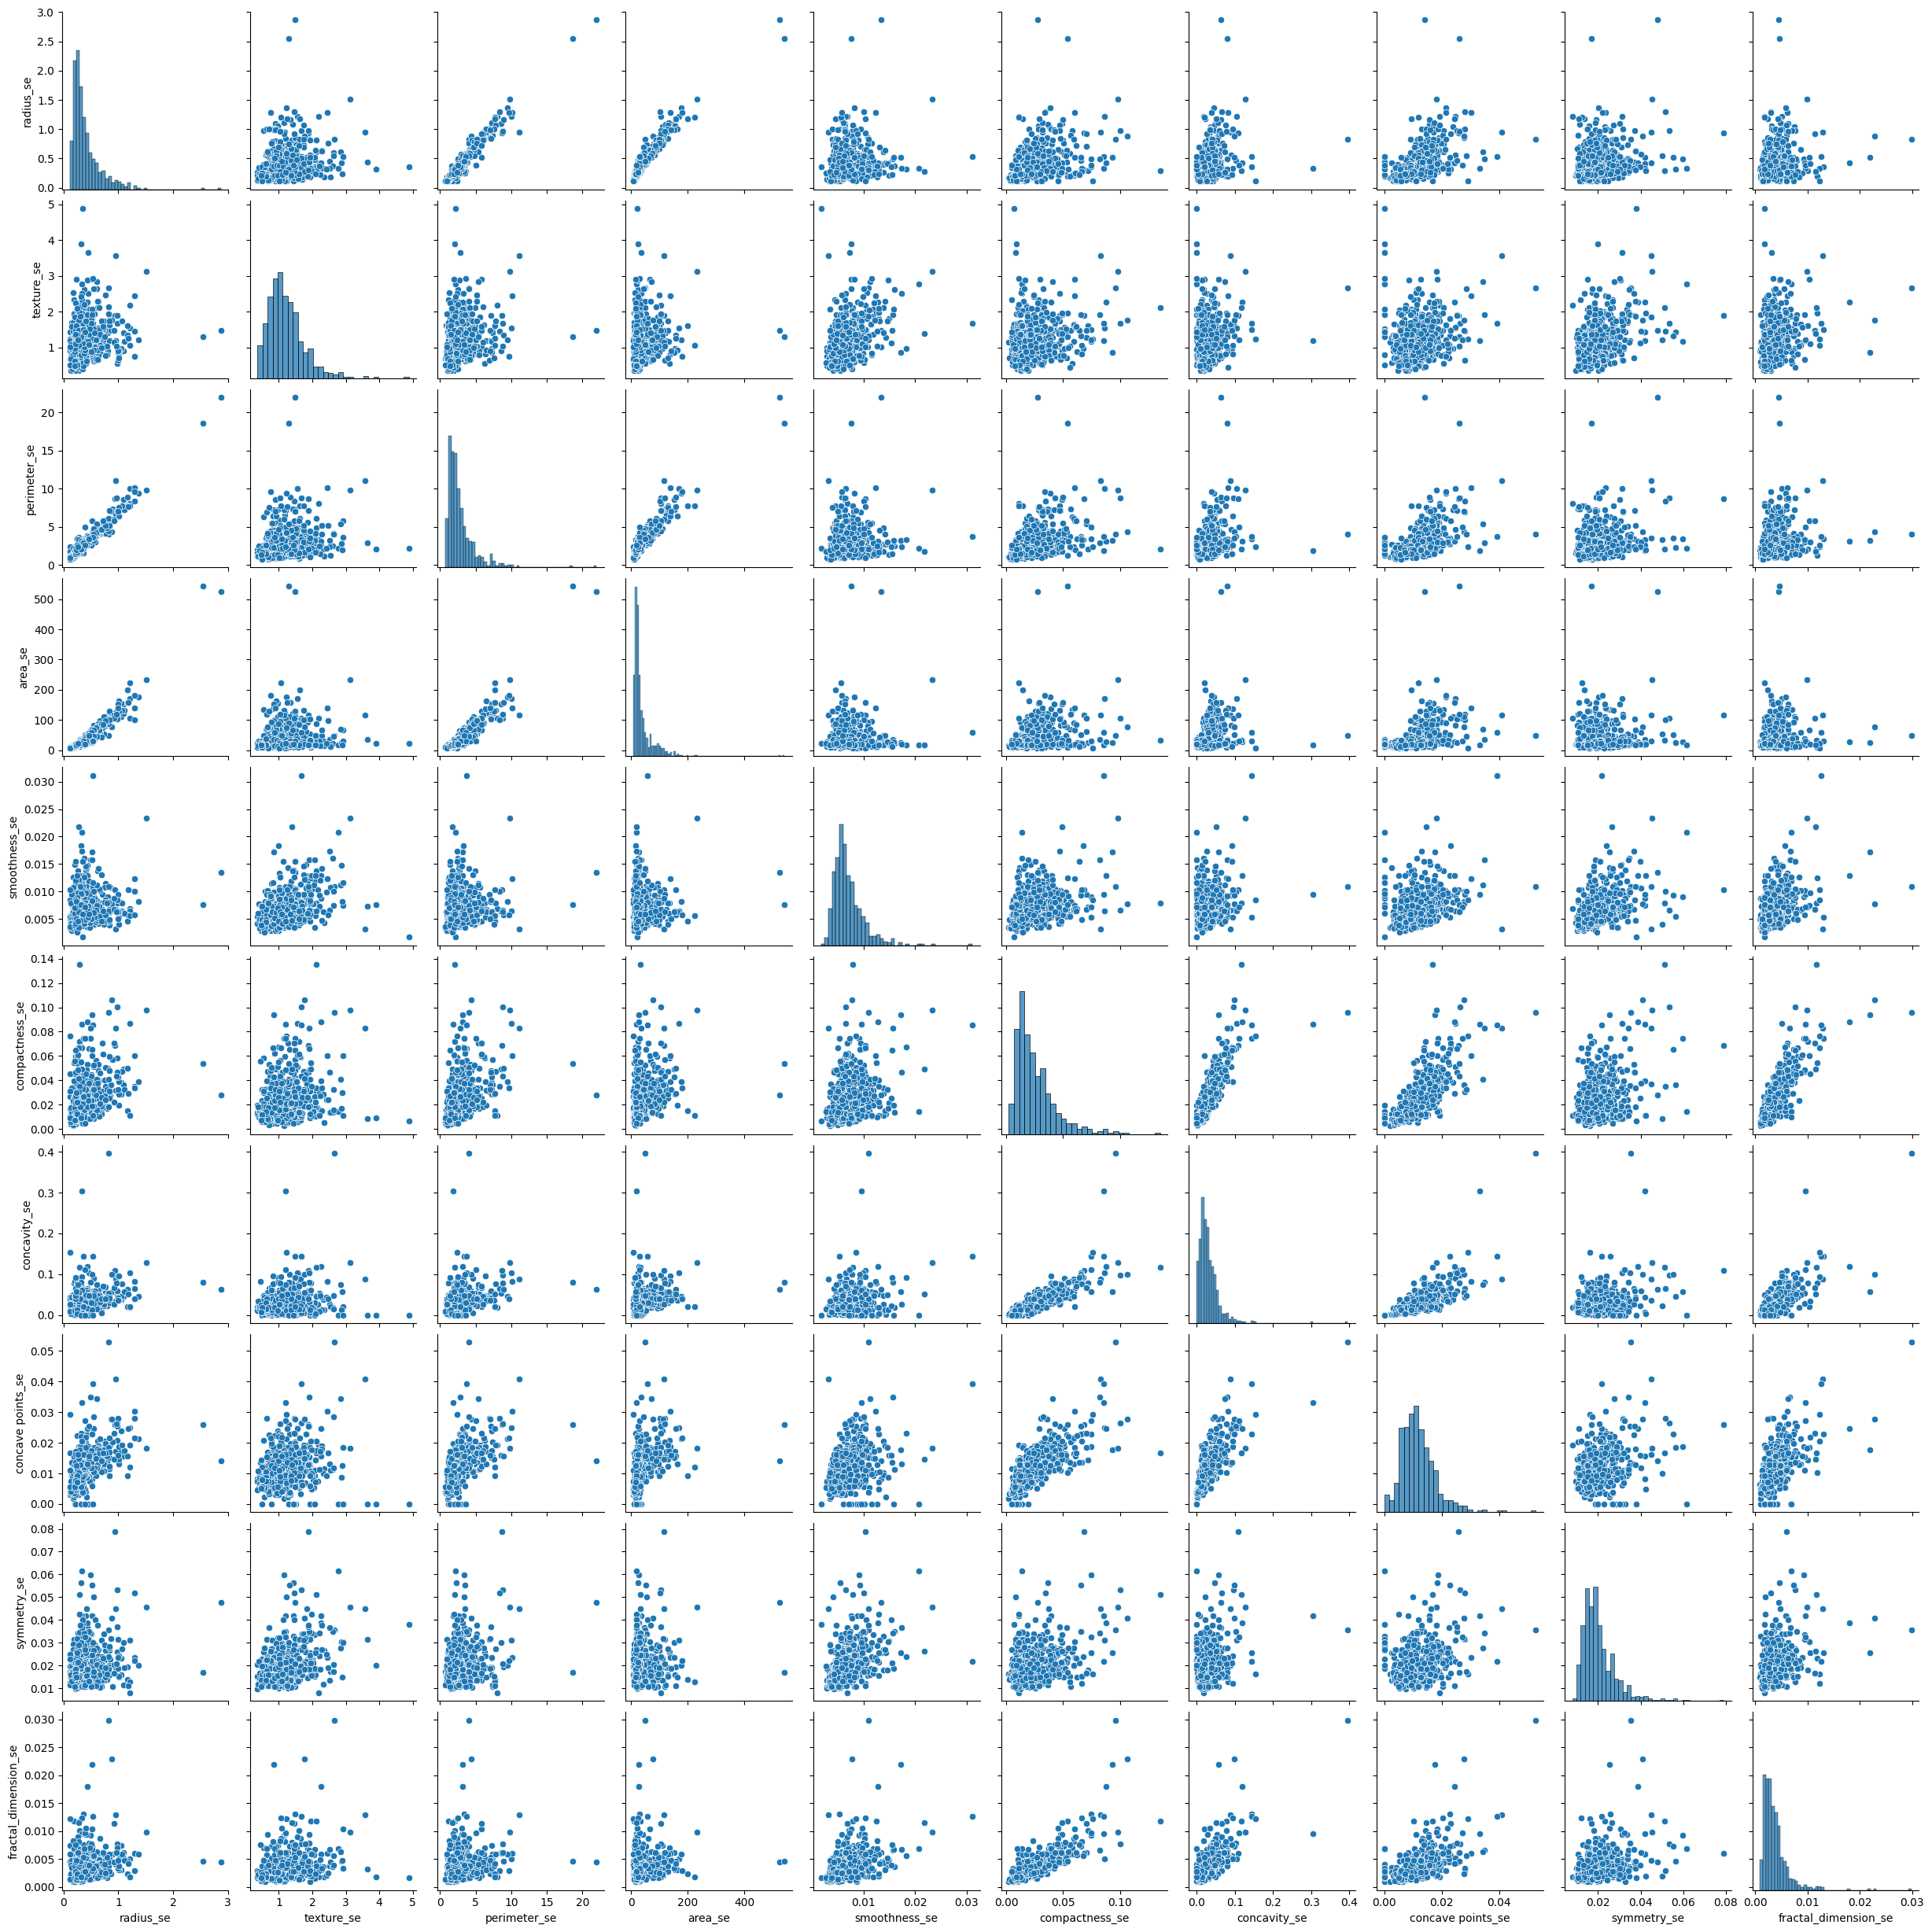

In [14]:
sns.pairplot(breast_cancer[s_cols]);
plt.savefig('plots/s_colsPairplot.png')

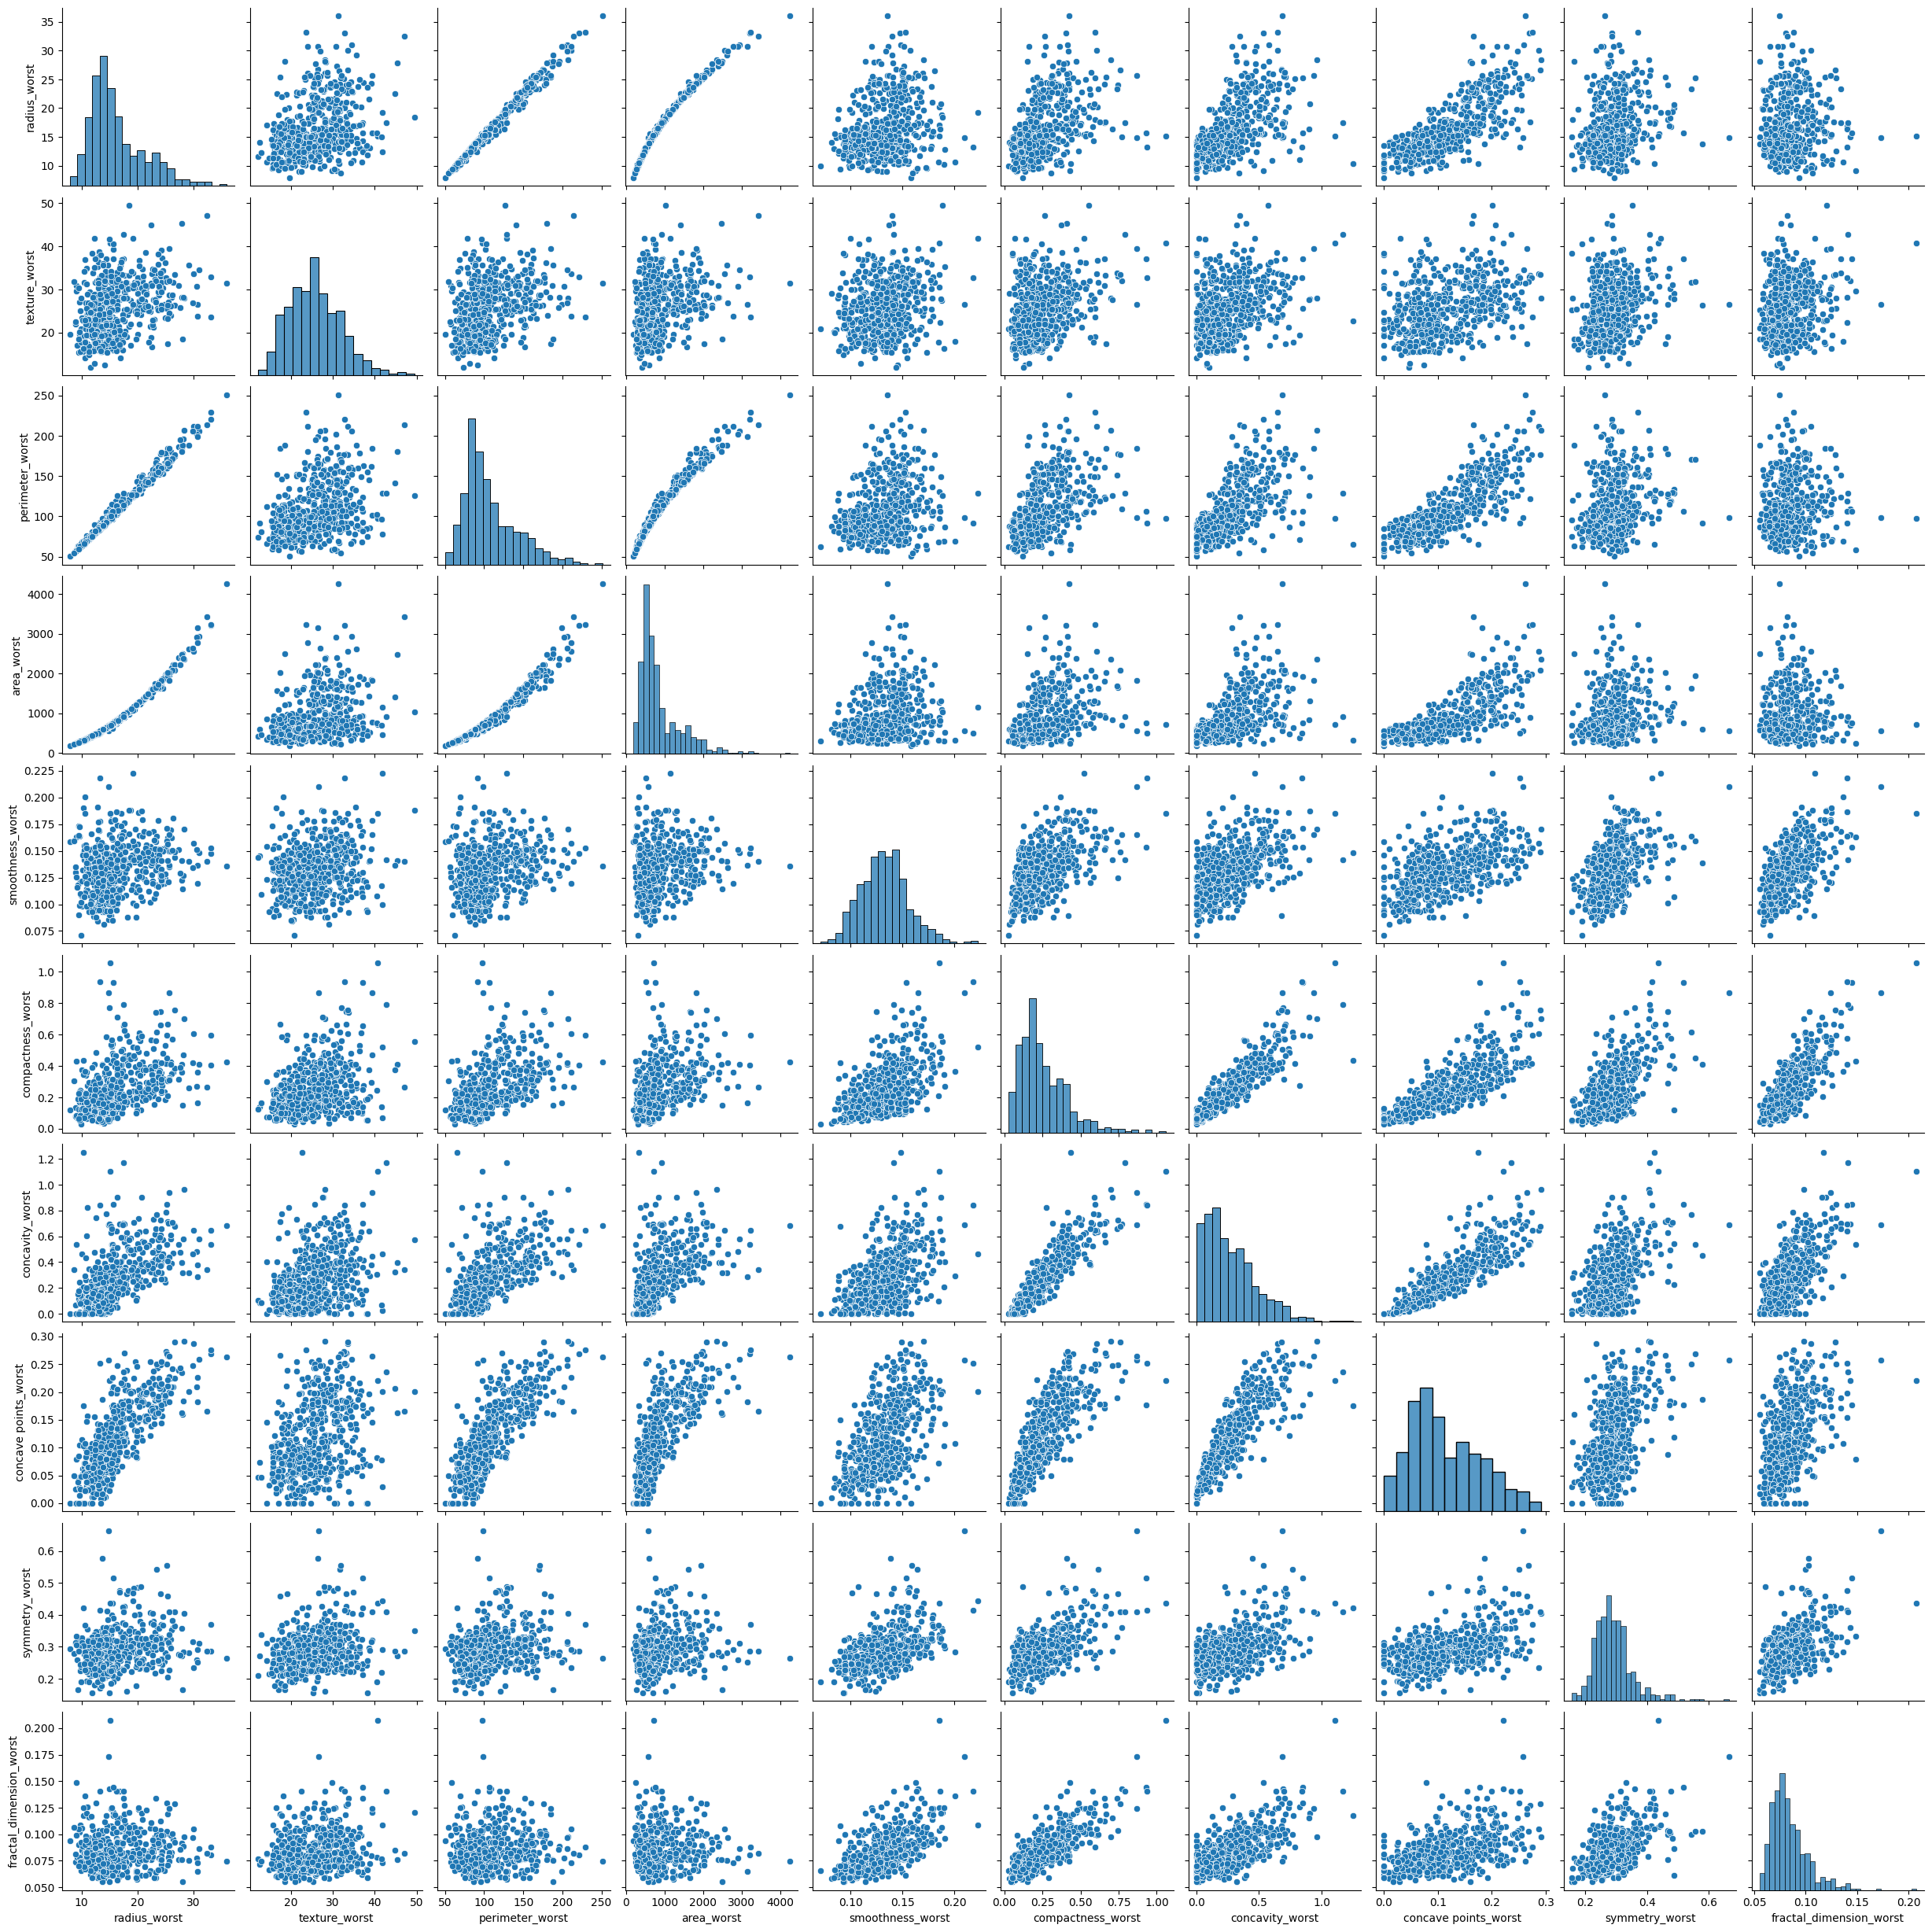

In [15]:
sns.pairplot(breast_cancer[w_cols]);
plt.savefig('plots/w_colsPairplot.png')

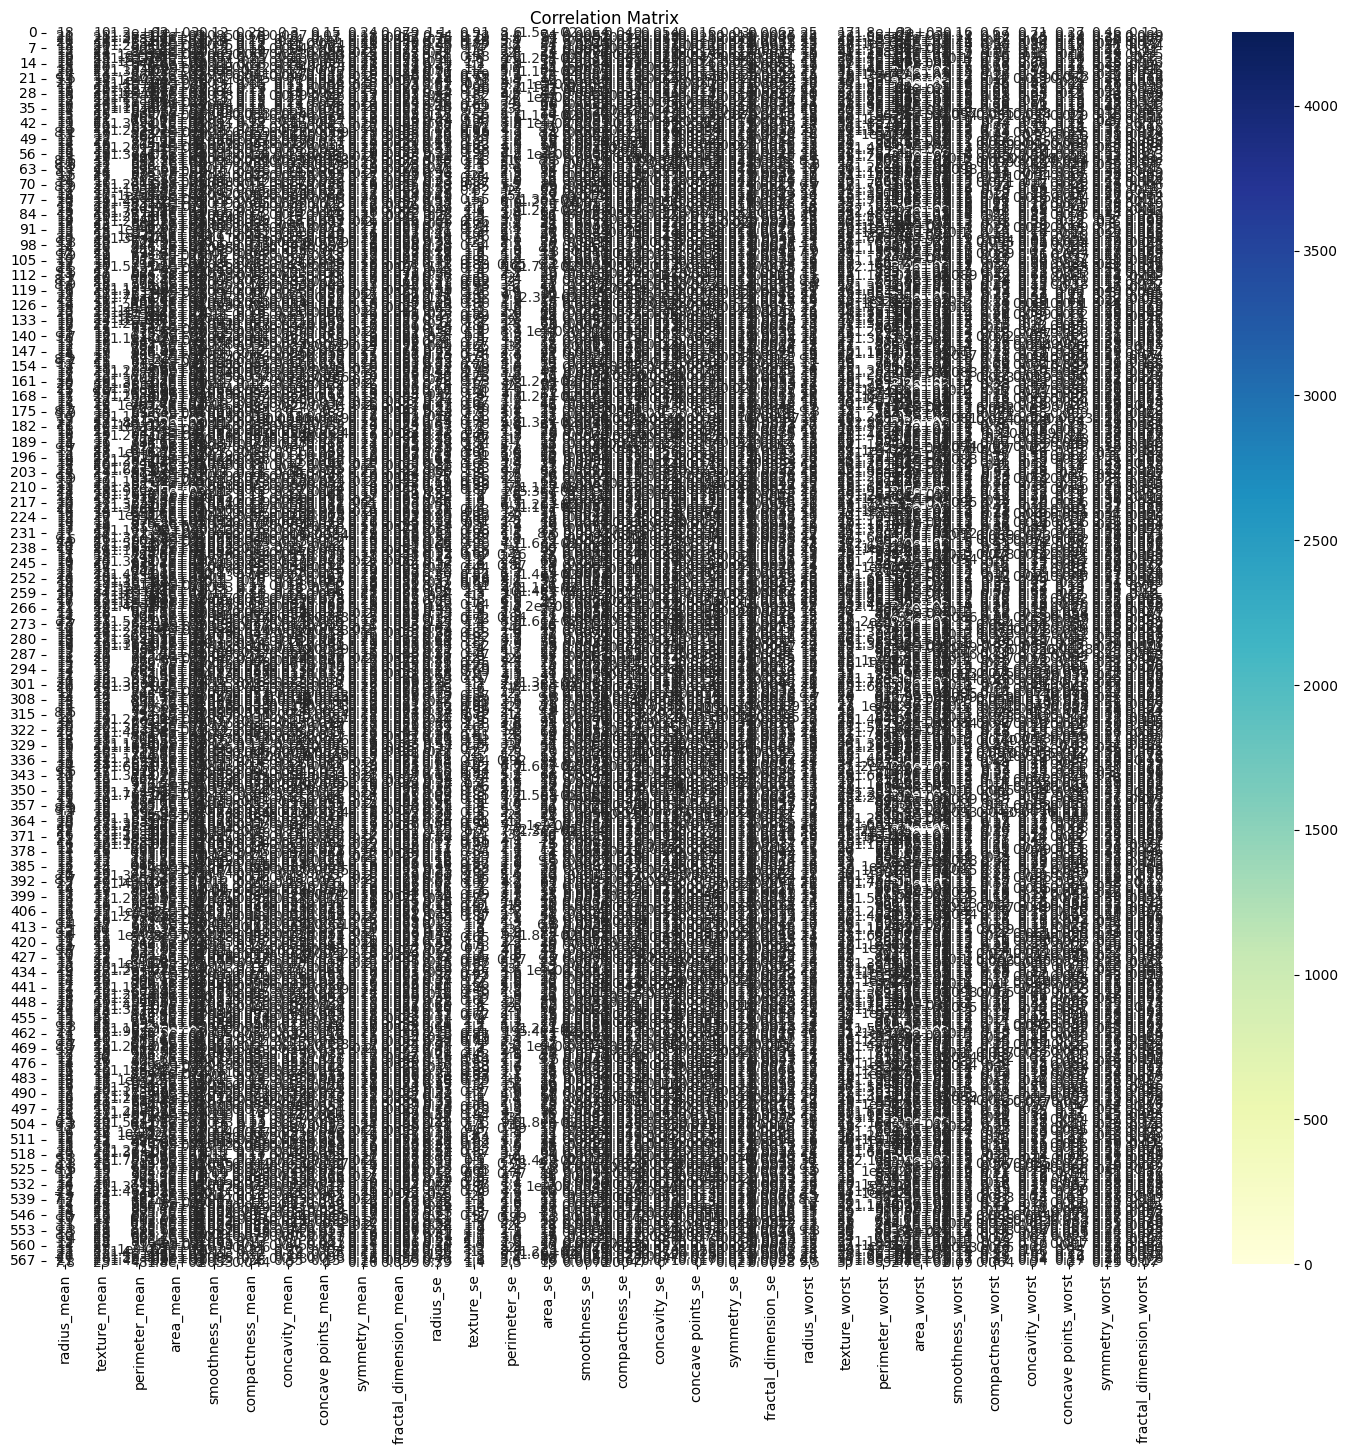

<Figure size 640x480 with 0 Axes>

In [106]:
corr_matrix = breast_cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('plots/Correlation_Matric.png')

## **_Feature Engineering_**

In [17]:
# dropping unnecessary columns
breast_cancer = breast_cancer.drop('id', axis=1)
breast_cancer.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

## **_Categorical Encoding_**

In [18]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'B': 0, 'M': 1})

In [19]:
breast_cancer.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [20]:
#Splitting the data
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [21]:
X_train.shape

(113, 30)

In [22]:
X_test.shape

(456, 30)

In [23]:
y_train.shape

(113,)

In [24]:
y_test.shape

(456,)

## **_Base Models_**

- Model 1: Logistic Regression
- Model 2: Random ForestClassifier
- Model 3: KNN
- Model 4: DecisionTree

In [25]:
# Define the models
models = {
    'LogisticRegression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'RandomForest' : RandomForestClassifier(),
    'DecisionTree' : DecisionTreeClassifier()
}

In [26]:
# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate given machine learning models.
    models:a dictionary of different scikit-learn machine learning
    '''
    # Dictionary to store model scores
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores
    

In [27]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'LogisticRegression': 0.9429824561403509,
 'KNN': 0.9013157894736842,
 'RandomForest': 0.9517543859649122,
 'DecisionTree': 0.8969298245614035}

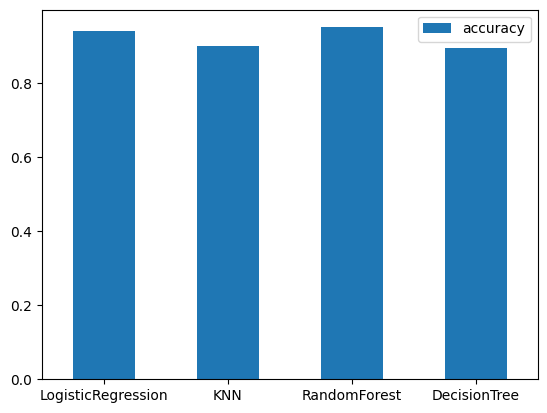

In [28]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation=0)
plt.savefig('plots/model_comparison.png')

In [29]:
# Tune KNN
train_scores = []
test_scores = []

# A list for different values of n_neigbhors
n_neighbors = np.arange(1, 21, 1)

knn = KNeighborsClassifier()

for i in n_neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [30]:
train_scores

[1.0,
 0.8938053097345132,
 0.9026548672566371,
 0.911504424778761,
 0.911504424778761,
 0.911504424778761,
 0.9203539823008849,
 0.9026548672566371,
 0.9026548672566371,
 0.8938053097345132,
 0.9026548672566371,
 0.9026548672566371,
 0.9026548672566371,
 0.8849557522123894,
 0.9026548672566371,
 0.8938053097345132,
 0.8938053097345132,
 0.8938053097345132,
 0.8938053097345132,
 0.8938053097345132]

In [31]:
test_scores

[0.8969298245614035,
 0.9232456140350878,
 0.9144736842105263,
 0.9342105263157895,
 0.9013157894736842,
 0.9144736842105263,
 0.8925438596491229,
 0.9166666666666666,
 0.8969298245614035,
 0.9210526315789473,
 0.9078947368421053,
 0.9166666666666666,
 0.9057017543859649,
 0.9100877192982456,
 0.9122807017543859,
 0.9232456140350878,
 0.9210526315789473,
 0.9166666666666666,
 0.9035087719298246,
 0.9122807017543859]

In [107]:
# Plot the training and test scores
plt.plot(n_neighbors, train_scores, label='Train Score', marker='o')
plt.plot(n_neighbors, test_scores, label='Test Score', marker='o')

# Highlight the best-performing numbr of neighbors
best_k = n_neighbors[np.argmax(test_scores)]
best_score = max(test_scores) * 100
plt.scatter(best_k, best_score/100, color='red', label=f'Best K={best_k}',  zorder=3)

# Formatting
plt.xticks(np.arange(1,21,1))
plt.xlabel('Number Of Neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.grid(True)

print(f'Mximum KNN score on the test data: {best_score:.2f}%')

# Show the plot
plt.show()
plt.savefig('plots/Maximum_KNN_score.png')

Mximum KNN score on the test data: 93.42%


<Figure size 640x480 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

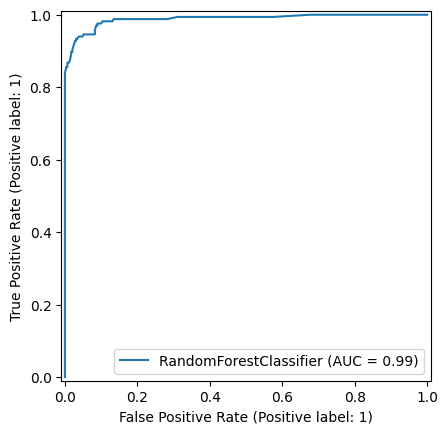

In [147]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Generate ROC curve display
    roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)

    # Calculate AUC score
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Add a legend entry manually (RocCurveDisplay doesn't handle legends well for multiple plots)
    plt.plot([], [], ' ', label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()

# Save the figure
plt.savefig('plots/gs-rf_RocCurve.png')

# Show the plot
plt.show()

## **_Hyperparameter Tuning With RandomizedSearchCV_**

In [33]:
# Parameters for logisticRegeression
grid_lr= {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'max_iter':[800, 1600, 3000]
}

# Parameters for randomForest
grid_rf = {
    'n_estimators': np.arange(200,300, 50),
    'max_depth':[None, 3, 6, 9],
    'min_samples_split': np.arange(2, 30, 2),
    'min_samples_leaf': np.arange(1, 25, 5),
}

# Parameters for DecisionTree
grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

In [34]:
# Tune the logistic Regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=grid_lr,
    cv=5,
    n_iter=30,
    verbose=True,
    random_state=42
)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [800, 1600, 3000],
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 800, 'C': np.float64(206.913808111479)}

In [36]:
rs_log_reg.best_score_

np.float64(0.9189723320158103)

_After hyperparamater tuning with RandomizedSearch it has been found that the LogisticRegression has decreased from 94.30% to 91.90%_

In [37]:
rs_rf = RandomizedSearchCV(
     estimator=RandomForestClassifier(),
    param_distributions=grid_rf,
    cv=5, 
    verbose=True,
    random_state=42
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 6, 9],
                                        'min_samples_leaf': array([ 1,  6, 11, 16, 21]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'n_estimators': array([200, 250])},
                   random_state=42, verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': np.int64(250),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(16),
 'max_depth': None}

In [39]:
rs_rf.best_score_

np.float64(0.9292490118577075)

After Performing Hyperparameter tuning RandomforestTree has decreased from 95,40% to 93.00%

In [40]:
rs_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=grid_dt,
    cv=5,
    verbose=True,
    random_state=42
)

rs_dt.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=42, verbose=True)

In [41]:
rs_dt.best_params_

{'min_samples_split': np.int64(9),
 'min_samples_leaf': np.int64(1),
 'max_features': 'log2',
 'max_depth': np.int64(12),
 'criterion': 'gini'}

In [42]:
rs_dt.best_score_

np.float64(0.9288537549407115)

After Performing Hyperparameter tuning with RandomizedSearch of Decision Tree it has been found that the model improved from 88.60% to 92.86%

## **_Hyperparamater Tuning With GridSearchCV_**

In [50]:
# Different Hyperparameters
gs_lr_grid = {
    'C' : np.logspace(-4, 4, 30),
    'solver': ['liblinear','lbfgs','saga']
}

gs_rf_grid = {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gs_dt_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 20, 30, 40],
    'min_samples_split':[2, 6, 12]
}

In [51]:
gs_lr = GridSearchCV(
    LogisticRegression(),
    param_grid = gs_lr_grid,
    cv=5,
    verbose=True
)

gs_lr.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             verbose=True)

In [52]:
gs_lr.best_params_

{'C': np.float64(0.0012689610031679222), 'solver': 'lbfgs'}

In [53]:
gs_lr.best_score_

np.float64(0.9197628458498024)

After Hyperparameter Tuning With GridSearch, the logistic Regression Model has decreased from 94.30% to 92%

In [54]:
gs_rf = GridSearchCV(
    RandomForestClassifier(),
    param_grid=gs_rf_grid,
    cv=5,
    verbose=True
)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

In [55]:
gs_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

In [56]:
gs_rf.best_score_

np.float64(0.9470355731225297)

After Hyperparameter Tuning With GridSearch, Random Forst model has decreased from 95.40% to 94.70%

In [57]:
gs_dt = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid = gs_dt_grid,
    cv=5,
    verbose=True
)

gs_dt.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 20, 30, 40],
                         'min_samples_split': [2, 6, 12]},
             verbose=True)

In [58]:
gs_dt.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 6}

In [59]:
gs_dt.best_score_

np.float64(0.9110671936758893)

After Perfoming HyperparameterTuning With GridSearchCV, DecisionTree Model has improve from 88.60% to 91.11%

In [63]:
gs_model_score = {
    'gs_lr':gs_lr.best_score_,
    'gs_dt' : gs_dt.best_score_,
    'gs_rf' : gs_rf.best_score_
    }

rs_modell_score = {
    'rs_log_reg' : rs_log_reg.best_score_,
    'rs_dt' : rs_dt.best_score_,
    'rs_rf' : rs_rf.best_score_
}


**_Evaluating The Tuned Machine Classifier Beyond Accuracy_**

- ROC Curve And AUC Score
- Confusion Matrix
- Classifcation Report
- Precision
- Recall
- F1-Score

In [65]:
gs_y_pred = gs_rf.predict(X_test)
gs_y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [69]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

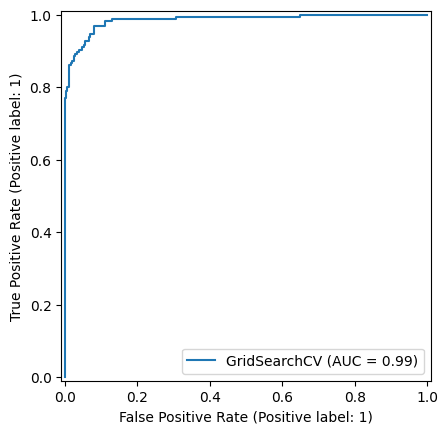

In [148]:
RocCurveDisplay.from_estimator(gs_rf,X_test, y_test)
plt.savefig('plots/gs-rf_RocCurve.png')

In [76]:
conf_mat = confusion_matrix(y_test, gs_y_pred)
print(conf_mat)

[[274  16]
 [ 12 154]]


In [94]:
def plot_confusion_matrix(y_test, gs_rf):
    '''
    Plots a nice looking confusion matrix using seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(5,5))
    ac = sns.heatmap(confusion_matrix(y_test,gs_y_pred),
    annot=True,
    cbar=False)

    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

    bottom, top = ax.get_ylim()
    ax.set_ylib = (bottom + 0.5, top - 0.5)


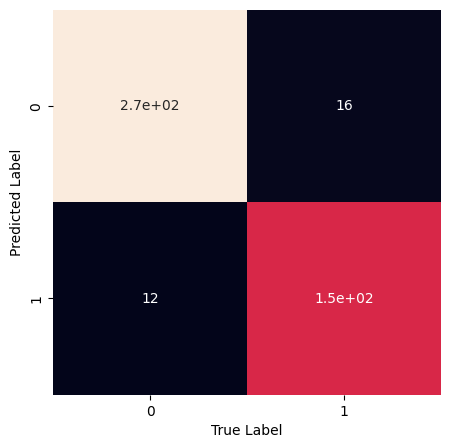

In [109]:
plot_confusion_matrix(y_test, gs_y_pred)
plt.savefig('plots/confusion_matrix.png')

In [96]:
# Getting a classification report
print(classification_report(y_test,gs_y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       290
           1       0.91      0.93      0.92       166

    accuracy                           0.94       456
   macro avg       0.93      0.94      0.93       456
weighted avg       0.94      0.94      0.94       456



In [97]:
# Best hyperparamters till now
gs_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

In [98]:
#Define The Model
rf_model = RandomForestClassifier(
    max_depth = 20,
    min_samples_leaf= 4,
    min_samples_split = 5,
    n_estimators=50
)

# Perform cross-validation
cv_acc = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.92105263, 0.93859649, 0.98245614, 0.97368421, 0.97345133])

In [100]:
cv_precision = cross_val_score(rf_model, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.9503485711244745)

In [101]:
cv_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.9408584820203367)

In [102]:
cv_recall = cross_val_score(rf_model, X, y,cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9343300110741971)

In [104]:
cv_metrics = pd.DataFrame(
    {
        'Accuracy': [pd.to_numeric(cv_acc, errors='coerce')],
        'Precision': [pd.to_numeric(cv_precision, errors='coerce')],
        'Recall': [pd.to_numeric(cv_recall, errors='coerce')],
        'F1': [pd.to_numeric(cv_f1, errors='coerce')]
    }
)

cv_metrics = cv_metrics.apply(pd.to_numeric, errors='coerce')
cv_metrics.T.plot.bar()
plt.ylabel('Score')
plt.title('Cross-validation Metrics')

# Save the plot before displaying it
plt.savefig('plots/Cross-validation_Metrics.png')

# Now show the plot
plt.show()


## **_Final Model Evaluation_**

In [110]:
gs_model_score

{'gs_lr': np.float64(0.9197628458498024),
 'gs_dt': np.float64(0.9110671936758893),
 'gs_rf': np.float64(0.9470355731225297)}

In [111]:
rs_modell_score

{'rs_log_reg': np.float64(0.9189723320158103),
 'rs_dt': np.float64(0.9288537549407115),
 'rs_rf': np.float64(0.9292490118577075)}

In [112]:
model_scores

{'LogisticRegression': 0.9429824561403509,
 'KNN': 0.9013157894736842,
 'RandomForest': 0.9517543859649122,
 'DecisionTree': 0.8969298245614035}

In [113]:
gs_rf_preds = gs_rf.predict(X_test)
gs_rf_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [114]:
y_test.values

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

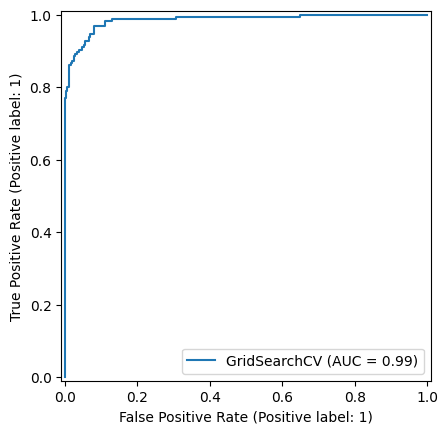

In [115]:
RocCurveDisplay.from_estimator(gs_rf, X_test, y_test)

In [116]:
conf_mat = confusion_matrix(y_test, gs_rf_preds)
print(conf_mat)

[[274  16]
 [ 12 154]]


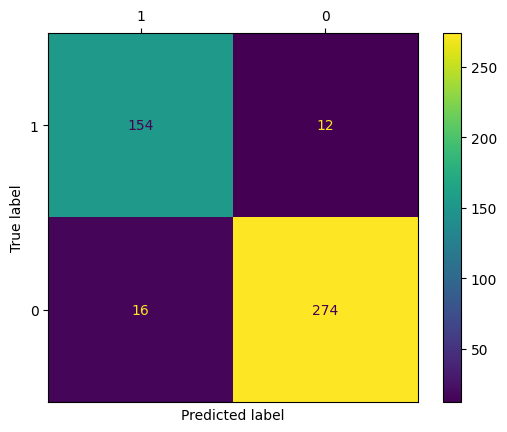

In [117]:
ConfusionMatrixDisplay.from_estimator(
    gs_rf,
    X_test,
    y_test,
    labels = [1, 0],
    colorbar=[False]
)

plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_ticks_position('top')
plt.savefig('plots/Conf_matrix.png')
plt.show()

In [120]:
print(
    classification_report(y_test, gs_rf_preds)
)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       290
           1       0.91      0.93      0.92       166

    accuracy                           0.94       456
   macro avg       0.93      0.94      0.93       456
weighted avg       0.94      0.94      0.94       456



In [121]:
gs_rf.best_params_

{'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 50}

In [122]:
accuracy = accuracy_score(y_test, gs_y_pred)
precision=precision_score(y_test, gs_y_pred)
recall = recall_score(y_test, gs_y_pred)
f1 =f1_score(y_test, gs_y_pred)

In [123]:
accuracy, precision, recall, f1

(0.9385964912280702, 0.9058823529411765, 0.927710843373494, 0.9166666666666666)

In [124]:
final_evaluation = pd.DataFrame(
    [accuracy, precision, recall, f1],
    index=['accuracy', 'precision','recall', 'f1'],
    columns=['score']
)

final_evaluation

score
accuracy   0.938596
precision  0.905882
recall     0.927711
f1         0.916667

In [125]:
bars = final_evaluation.plot.bar(
    legend=False,
    xlabel='Classification metrics',
    ylabel='scores',
    rot=0
)

# Customize
plt.bar_label(
    bars.containers[0],
    fmt='%1.2g',
    label_type='center',
    color='white'
)

plt.xlabel('Classification metrics', labelpad=30)
plt.ylabel('Scores', labelpad=30)
plt.show()
plt.savefig('ClassificationMetrics.png')

<Figure size 640x480 with 0 Axes>

**_Feature Importance_**

In [126]:
best_gs_rf = gs_rf.best_estimator_
best_gs_rf

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [128]:
best_gs_rf.feature_importances_

array([4.69379513e-03, 5.67890865e-03, 6.81412940e-02, 5.61944492e-03,
       1.01170008e-03, 1.27027803e-02, 1.48393248e-01, 2.19585254e-01,
       3.75330317e-03, 2.66996372e-03, 1.38845817e-03, 2.82970920e-03,
       3.55964061e-03, 2.42263370e-02, 1.61023316e-03, 8.38146295e-04,
       1.24662301e-04, 2.31283641e-03, 2.40937868e-03, 1.95921435e-03,
       9.56843499e-02, 8.66008199e-03, 8.53560493e-02, 7.44207640e-02,
       4.75901833e-04, 9.51750757e-03, 6.51221480e-02, 1.25842736e-01,
       2.06738146e-02, 7.38338971e-04])

In [129]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [130]:
imp_features = pd.DataFrame(
    data=best_gs_rf.feature_importances_.T, index=X_train.columns, columns=['Feature Importance']
)
imp_features

Feature Importance
radius_mean                        0.004694
texture_mean                       0.005679
perimeter_mean                     0.068141
area_mean                          0.005619
smoothness_mean                    0.001012
compactness_mean                   0.012703
concavity_mean                     0.148393
concave points_mean                0.219585
symmetry_mean                      0.003753
fractal_dimension_mean             0.002670
radius_se                          0.001388
texture_se                         0.002830
perimeter_se                       0.003560
area_se                            0.024226
smoothness_se                      0.001610
compactness_se                     0.000838
concavity_se                       0.000125
concave points_se                  0.002313
symmetry_se                        0.002409
fractal_dimension_se               0.001959
radius_worst                       0.095684
texture_worst                      0.008660
perimeter_worst                    0.085356
area_worst                         0.074421
smoothness_worst                   0.000476
compactness_worst                  0.009518
concavity_worst                    0.065122
concave points_worst               0.125843
symmetry_worst                     0.020674
fractal_dimension_worst            0.000738

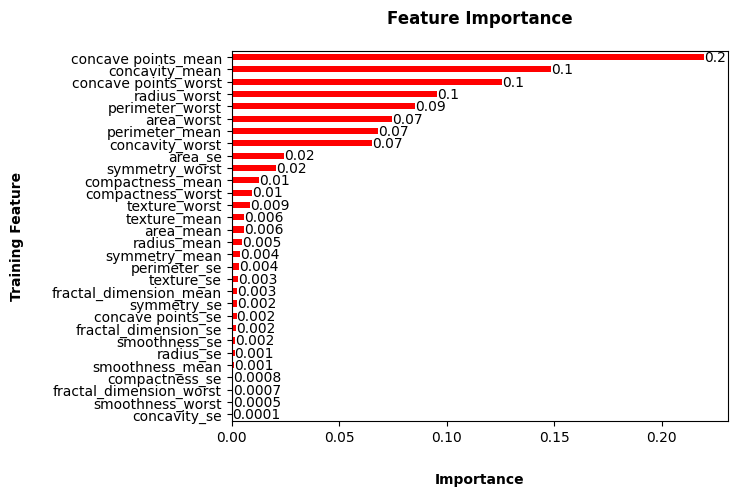

In [133]:
bar = imp_features.sort_values(by='Feature Importance').plot.barh(
    legend=False,
    color='red'
)

# Customize
bar.set_xlabel(xlabel='Importance', labelpad=20,weight='bold')
bar.set_ylabel(ylabel='Training Feature', labelpad=20, weight='bold')
bar.set_title('Feature Importance', pad=20, weight='heavy')
bar.bar_label(bar.containers[0], fmt='%1.1g')
plt.savefig('plots/feature_importance.png')
plt.show(bar)

In [134]:
pd.crosstab(breast_cancer.concavity_se, breast_cancer.diagnosis)

diagnosis      0  1
concavity_se       
0.000000      13  0
0.000692       1  0
0.000793       1  0
0.000974       1  0
0.001128       1  0
...           .. ..
0.143500       1  0
0.143800       0  1
0.153500       1  0
0.303800       1  0
0.396000       1  0

[533 rows x 2 columns]

In [135]:
pd.crosstab(breast_cancer.concavity_mean, breast_cancer.diagnosis)

diagnosis        0  1
concavity_mean       
0.000000        13  0
0.000692         1  0
0.000974         1  0
0.001194         1  0
0.001461         1  0
...             .. ..
0.363500         0  1
0.375400         0  1
0.410800         1  0
0.426400         0  1
0.426800         0  1

[537 rows x 2 columns]

In [139]:
import joblib as jbl
jbl.dump(best_gs_rf,filename='./breast_cancer_randomforest_94%')

['./breast_cancer_randomforest_94%']

In [140]:
loaded_rf = jbl.load('./breast_cancer_randomforest_94%')

loaded_rf.score(X_test,y_test)

0.9385964912280702